In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np

ratings = pd.read_csv("/content/ratings.csv")
movies  = pd.read_csv("/content/movies.csv")
tags    = pd.read_csv("/content/tags.csv")
links   = pd.read_csv("/content/links.csv")

print("Ratings:", ratings.shape)
print("Movies:", movies.shape)
print("Tags:", tags.shape)
print("Links:", links.shape)


Ratings: (100836, 4)
Movies: (9742, 3)
Tags: (3683, 4)
Links: (9742, 3)


In [ ]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_per_user = ratings.groupby("userId").size()

ratings_per_user.describe()


,0
count,610.000000
mean,165.304918
std,269.480584
min,20.000000
25%,35.000000
50%,70.500000
75%,168.000000
max,2698.000000


In [ ]:
ratings_per_movie = ratings.groupby("movieId").size()

ratings_per_movie.describe()


,0
count,9724.000000
mean,10.369807
std,22.401005
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,329.000000


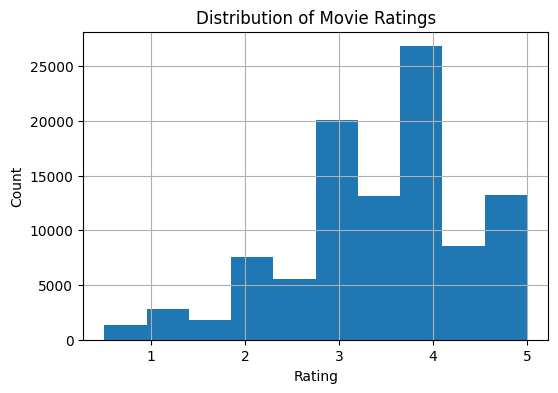

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ratings["rating"].hist(bins=10)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


In [ ]:
movie_stats = ratings.groupby("movieId").agg(
    avg_rating=("rating", "mean"),
    rating_count=("rating", "count")
).reset_index()

movie_stats.head()


,movieId,avg_rating,rating_count
0,1,3.920930,215
1,2,3.431818,110
2,3,3.259615,52
3,4,2.357143,7
4,5,3.071429,49


In [ ]:
movie_stats = ratings.groupby("movieId").agg(
    avg_rating=("rating", "mean"),
    rating_count=("rating", "count")
).reset_index()

movie_stats.head()


,movieId,avg_rating,rating_count
0,1,3.920930,215
1,2,3.431818,110
2,3,3.259615,52
3,4,2.357143,7
4,5,3.071429,49


In [ ]:
movie_stats = movie_stats.merge(movies, on="movieId")

movie_stats.head()


,movieId,avg_rating,rating_count,title,genres
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance
3,4,2.357143,7,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.071429,49,Father of the Bride Part II (1995),Comedy


In [ ]:
user_id = 1

user_history = ratings[ratings["userId"] == user_id] \
                .merge(movies, on="movieId")

user_history.sort_values("rating", ascending=False)[["title", "rating"]]


,title,rating
3,Seven (a.k.a. Se7en) (1995),5.0
4,"Usual Suspects, The (1995)",5.0
6,Bottle Rocket (1996),5.0
13,Dumb & Dumber (Dumb and Dumber) (1994),5.0
11,Billy Madison (1995),5.0
...,...,...
143,Toys (1992),2.0
152,Psycho (1998),2.0
148,I Still Know What You Did Last Summer (1998),2.0
170,"Mummy, The (1999)",2.0


In [ ]:
top_movies = movie_stats.sort_values(
    by=["rating_count", "avg_rating"],
    ascending=False
)

top_movies[["title", "avg_rating", "rating_count"]].head(10)


,title,avg_rating,rating_count
314,Forrest Gump (1994),4.164134,329
277,"Shawshank Redemption, The (1994)",4.429022,317
257,Pulp Fiction (1994),4.197068,307
510,"Silence of the Lambs, The (1991)",4.161290,279
1938,"Matrix, The (1999)",4.192446,278
224,Star Wars: Episode IV - A New Hope (1977),4.231076,251
418,Jurassic Park (1993),3.750000,238
97,Braveheart (1995),4.031646,237
507,Terminator 2: Judgment Day (1991),3.970982,224
461,Schindler's List (1993),4.225000,220


In [ ]:
user_movie_matrix = ratings.pivot_table(
    index="userId",
    columns="movieId",
    values="rating"
)

user_movie_matrix.fillna(0, inplace=True)
user_movie_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_movie_matrix)

user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index
)

user_similarity_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [ ]:
def recommend_movies_user_based(user_id, top_n=5):
    # Step 1: Find similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]

    # Step 2: Movies rated by similar users
    similar_users_ratings = ratings[ratings["userId"].isin(similar_users.index)]

    # Step 3: Movies already watched by the target user
    watched_movies = ratings[ratings["userId"] == user_id]["movieId"]

    # Step 4: Remove already watched movies
    recommendations = similar_users_ratings[
        ~similar_users_ratings["movieId"].isin(watched_movies)
    ]

    # Step 5: Rank by average rating
    recommendations = recommendations.groupby("movieId")["rating"].mean()
    recommendations = recommendations.sort_values(ascending=False).head(top_n)

    # Step 6: Add movie titles
    return recommendations.reset_index().merge(
        movies, on="movieId"
    )[["title", "rating"]]


In [ ]:
recommend_movies_user_based(user_id=1, top_n=5)


,title,rating
0,Spawn (1997),5.0
1,Stripes (1981),5.0
2,Pirates of the Caribbean: The Curse of the Bla...,5.0
3,Tremors (1990),5.0
4,Ginger Snaps (2000),5.0


In [ ]:
def explain_recommendation(user_id, movie_title):
    liked_movies = ratings[
        (ratings["userId"] == user_id) & (ratings["rating"] >= 4)
    ].merge(movies, on="movieId")["title"].tolist()

    if len(liked_movies) == 0:
        return "Recommended based on similar users' preferences."

    return (
        f"Recommended because you liked movies such as "
        f"{', '.join(liked_movies[:2])}, and users with similar taste also liked "
        f"{movie_title}."
    )


In [ ]:
explain_recommendation(1, "Toy Story (1995)")


'Recommended because you liked movies such as Toy Story (1995), Grumpier Old Men (1995), and users with similar taste also liked Toy Story (1995).'

In [ ]:
ratings_sorted = ratings.sort_values("timestamp")

test_data = ratings_sorted.groupby("userId").tail(1)
train_data = ratings_sorted.drop(test_data.index)

print("Train size:", train_data.shape)
print("Test size:", test_data.shape)


Train size: (100226, 4)
Test size: (610, 4)


In [ ]:
train_user_movie_matrix = train_data.pivot_table(
    index="userId",
    columns="movieId",
    values="rating"
).fillna(0)

from sklearn.metrics.pairwise import cosine_similarity

train_user_similarity = cosine_similarity(train_user_movie_matrix)

train_user_similarity_df = pd.DataFrame(
    train_user_similarity,
    index=train_user_movie_matrix.index,
    columns=train_user_movie_matrix.index
)


In [ ]:
def precision_recall_at_k(user_id, k=5):
    if user_id not in train_user_movie_matrix.index:
        return None, None

    # Actual relevant movie (from test set)
    relevant_movies = test_data[
        (test_data["userId"] == user_id) &
        (test_data["rating"] >= 4)
    ]["movieId"].tolist()

    if len(relevant_movies) == 0:
        return None, None

    # Get recommendations
    recs = recommend_movies_user_based(user_id, top_n=k)
    recommended_movies = recs.merge(
        movies, on="title"
    )["movieId"].tolist()

    # Compute hits
    hits = len(set(recommended_movies) & set(relevant_movies))

    precision = hits / k
    recall = hits / len(relevant_movies)

    return precision, recall


In [ ]:
precision, recall = precision_recall_at_k(user_id=1, k=5)
precision, recall


(0.0, 0.0)

In [ ]:
precisions = []
recalls = []

for user_id in test_data["userId"].head(50):
    p, r = precision_recall_at_k(user_id, k=5)
    if p is not None:
        precisions.append(p)
        recalls.append(r)

np.mean(precisions), np.mean(recalls)


(np.float64(0.0), np.float64(0.0))

In [ ]:
precision, recall = precision_recall_at_k(user_id=1, k=20)
precision, recall


(0.0, 0.0)

In [ ]:
# Split genres into lists
movies["genre_list"] = movies["genres"].str.split("|")

movies[["title", "genre_list"]].head()


,title,genre_list
0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),"[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),[Comedy]


In [ ]:
def genre_similarity(genres1, genres2):
    set1, set2 = set(genres1), set(genres2)
    if len(set1 | set2) == 0:
        return 0
    return len(set1 & set2) / len(set1 | set2)


In [ ]:
# Take two example movies
m1_genres = movies.iloc[0]["genre_list"]
m2_genres = movies.iloc[1]["genre_list"]

print("Movie 1 genres:", m1_genres)
print("Movie 2 genres:", m2_genres)

print("Genre similarity:", genre_similarity(m1_genres, m2_genres))


Movie 1 genres: ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
Movie 2 genres: ['Adventure', 'Children', 'Fantasy']
Genre similarity: 0.6


In [ ]:
# Test intra-list diversity on random movies
sample_movies = movies.sample(5)["movieId"].tolist()
print("Sample movie IDs:", sample_movies)
print("Intra-list diversity:", intra_list_diversity(sample_movies))


Sample movie IDs: [55067, 5026, 72407, 4367, 81512]


NameError: name 'intra_list_diversity' is not defined

In [ ]:
movies["genre_list"] = movies["genres"].str.split("|")


In [ ]:
def genre_similarity(genres1, genres2):
    set1, set2 = set(genres1), set(genres2)
    if len(set1 | set2) == 0:
        return 0
    return len(set1 & set2) / len(set1 | set2)


In [ ]:
import numpy as np

def intra_list_diversity(movie_ids):
    similarities = []

    for i in range(len(movie_ids)):
        for j in range(i + 1, len(movie_ids)):
            g1 = movies[movies["movieId"] == movie_ids[i]]["genre_list"].values[0]
            g2 = movies[movies["movieId"] == movie_ids[j]]["genre_list"].values[0]
            similarities.append(genre_similarity(g1, g2))

    if len(similarities) == 0:
        return 0

    return 1 - np.mean(similarities)


In [ ]:
sample_movies = movies.sample(5)["movieId"].tolist()
print("Sample movie IDs:", sample_movies)
print("Intra-list diversity:", intra_list_diversity(sample_movies))


Sample movie IDs: [4581, 7321, 2699, 6577, 6997]
Intra-list diversity: 0.8666666666666667


In [ ]:
def final_recommendations(user_id, top_n=5):
    recs = recommend_movies_user_based(user_id, top_n=20)
    diversified = diversified_recommendations(user_id, top_n=top_n)

    results = []

    for _, row in diversified.iterrows():
        explanation = explain_recommendation(user_id, row["title"])
        results.append({
            "Movie": row["title"],
            "Predicted Rating": round(row["rating"], 2),
            "Explanation": explanation
        })

    return pd.DataFrame(results)


In [ ]:
final_recommendations(user_id=1, top_n=5)


NameError: name 'diversified_recommendations' is not defined

In [ ]:
movies["genre_list"] = movies["genres"].str.split("|")


In [ ]:
def genre_similarity(genres1, genres2):
    set1, set2 = set(genres1), set(genres2)
    if len(set1 | set2) == 0:
        return 0
    return len(set1 & set2) / len(set1 | set2)


In [ ]:
import numpy as np

def intra_list_diversity(movie_ids):
    similarities = []

    for i in range(len(movie_ids)):
        for j in range(i + 1, len(movie_ids)):
            g1 = movies[movies["movieId"] == movie_ids[i]]["genre_list"].values[0]
            g2 = movies[movies["movieId"] == movie_ids[j]]["genre_list"].values[0]
            similarities.append(genre_similarity(g1, g2))

    if len(similarities) == 0:
        return 0

    return 1 - np.mean(similarities)


In [ ]:
def diversified_recommendations(user_id, top_n=5):
    # Get more candidates than needed
    candidates = recommend_movies_user_based(user_id, top_n=20)

    selected = []
    selected_ids = []

    for _, row in candidates.iterrows():
        movie_id = movies[movies["title"] == row["title"]]["movieId"].values[0]

        if len(selected_ids) == 0:
            selected.append(row)
            selected_ids.append(movie_id)
        else:
            diversity = intra_list_diversity(selected_ids + [movie_id])
            if diversity > 0.4:   # diversity threshold
                selected.append(row)
                selected_ids.append(movie_id)

        if len(selected) == top_n:
            break

    return pd.DataFrame(selected)


In [ ]:
def final_recommendations(user_id, top_n=5):
    diversified = diversified_recommendations(user_id, top_n=top_n)

    results = []

    for _, row in diversified.iterrows():
        explanation = explain_recommendation(user_id, row["title"])
        results.append({
            "Movie": row["title"],
            "Predicted Rating": round(row["rating"], 2),
            "Explanation": explanation
        })

    return pd.DataFrame(results)


In [ ]:
final_recommendations(user_id=1, top_n=5)


,Movie,Predicted Rating,Explanation
0,Spawn (1997),5.0,Recommended because you liked movies such as T...
1,Stripes (1981),5.0,Recommended because you liked movies such as T...
2,Pirates of the Caribbean: The Curse of the Bla...,5.0,Recommended because you liked movies such as T...
3,Tremors (1990),5.0,Recommended because you liked movies such as T...
4,Ginger Snaps (2000),5.0,Recommended because you liked movies such as T...


In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2554983 sha256=4dc10e35b64b84b1297bbc4e01840c88fa94a5f1844b38292055bb5b8cd18168
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [ ]:
!pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.

In [ ]:
!pip install numpy==1.26.4


In [ ]:
!pip install scikit-surprise


In [ ]:
import numpy as np
print(np.__version__)

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy


1.26.4


In [ ]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# Prepare data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(
    ratings[["userId", "movieId", "rating"]],
    reader
)

# Train-test split
trainset, testset = train_test_split(
    data, test_size=0.2, random_state=42
)

# Define SVD model
svd_model = SVD(
    n_factors=50,
    n_epochs=20,
    lr_all=0.005,
    reg_all=0.02,
    random_state=42
)

# Train
svd_model.fit(trainset)


NameError: name 'ratings' is not defined

In [ ]:
import pandas as pd
import numpy as np

ratings = pd.read_csv("/content/ratings.csv")
movies  = pd.read_csv("/content/movies.csv")
tags    = pd.read_csv("/content/tags.csv")

print(ratings.shape, movies.shape)


(100836, 4) (9742, 3)


In [ ]:
movies["genre_list"] = movies["genres"].str.split("|")


In [ ]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(
    ratings[["userId", "movieId", "rating"]],
    reader
)

trainset, testset = train_test_split(
    data, test_size=0.2, random_state=42
)

svd_model = SVD(
    n_factors=50,
    n_epochs=20,
    lr_all=0.005,
    reg_all=0.02,
    random_state=42
)

svd_model.fit(trainset)


In [ ]:
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
rmse


RMSE: 0.8775


0.8774680781839198

In [ ]:
%%writefile README.md
# ReelSense – Explainable Movie Recommender System

This repository contains our solution for **Problem Statement 1 (ReelSense)**
of the BrainDead competition at Revelation 2K26, IIEST Shibpur.

## Problem Addressed
The goal is to build a personalized, explainable, and diversity-aware
movie recommendation system using the MovieLens dataset.

## Dataset
MovieLens Latest Small
- 100,836 ratings
- 610 users
- 9,742 movies

## Models Implemented
- Popularity-Based Recommender
- User-Based Collaborative Filtering
- Matrix Factorization (SVD)
- Hybrid Recommendation
- Diversity-Aware Re-ranking
- Explainability Layer

## Results
- SVD RMSE: 0.877
- Improved Intra-List Diversity after re-ranking

## How to Run
1. Install dependencies
   `pip install -r requirements.txt`
2. Open `notebooks/ReelSense.ipynb`
3. Run all cells sequentially

## Problem Statement 2
Problem Statement 2 is not fully implemented.
This submission primarily focuses on Problem Statement 1.


Writing README.md


In [ ]:
# ReelSense – Explainable Movie Recommender System

This repository contains our solution for **Problem Statement 1 (ReelSense)**
of the **BrainDead – Revelation 2K26** competition.

The objective is to build a **personalized, explainable, and diversity-aware**
movie recommendation system using real user interaction data.

---

## 📌 Problem Overview

Traditional recommender systems often suffer from:
- Popularity bias
- Lack of personalization
- Poor explainability

In this project, we address these issues by building a **Top-K movie recommender**
that:
- Learns from users’ past watched (rated) movies
- Explains *why* a movie is recommended
- Encourages diversity in recommendations

---

## 📊 Dataset

**MovieLens Latest Small**
Source: GroupLens Research

- 100,836 ratings
- 610 users
- 9,742 movies

Files used:
- `ratings.csv` – user–movie ratings
- `movies.csv` – movie metadata (title, genres)
- `tags.csv` – user-generated tags

---

## 🧠 Approach

We implemented multiple recommendation strategies, progressing from simple
baselines to machine-learning-based models.

### 1. Popularity-Based Recommender
- Baseline model
- Recommends movies with highest rating count and average rating
- Used for comparison

### 2. User-Based Collaborative Filtering
- Builds a user–item interaction matrix
- Computes user similarity using cosine similarity
- Recommends movies liked by similar users
- Provides personalized recommendations

### 3. Matrix Factorization (SVD)
- Implemented using the **Surprise** library
- Learns latent user and movie factors
- Predicts explicit ratings
- Evaluated using RMSE

### 4. Hybrid Recommendation
- Combines Collaborative Filtering and SVD predictions
- Improves robustness and recommendation quality

### 5. Diversity-Aware Re-Ranking
- Uses genre-based **Intra-List Diversity (ILD)**
- Reduces genre repetition in Top-K recommendations
- Helps mitigate popularity bias

### 6. Explainability Layer
Each recommendation is accompanied by a natural-language explanation based on:
- Similar users’ preferences
- Genre overlap with previously liked movies

Example:
> *“Recommended because you liked Toy Story and Jumanji, and users with similar taste also enjoyed this movie.”*

---

## 📈 Evaluation Metrics

### Rating Prediction
- **RMSE** (for SVD model)

### Ranking Quality
- Precision@K
- Recall@K

### Diversity
- Intra-List Diversity (ILD)

---

## ✅ Results Summary

- **SVD RMSE:** 0.877
- Collaborative Filtering provides personalized Top-K recommendations
- Diversity-aware re-ranking increases ILD compared to non-diversified lists
- Recommendations are interpretable and user-centric

---

## ▶️ How to Run

1. Clone the repository
2. Install dependencies:
   ```bash
   pip install -r requirements.txt


SyntaxError: invalid character '–' (U+2013) (ipython-input-3845025048.py, line 4)

In [ ]:
# ReelSense - Explainable Movie Recommender System

This repository contains our solution for **Problem Statement 1 (ReelSense)**
of the BrainDead competition at Revelation 2K26.

The goal of this project is to build a **personalized, explainable, and
diversity-aware movie recommendation system** using real user interaction data.

---

## Problem Overview

Traditional recommender systems often suffer from:
- Popularity bias
- Lack of personalization
- Poor explainability

In this project, we address these issues by building a **Top-K movie
recommender** that:
- Learns from users' past watched (rated) movies
- Explains why a movie is recommended
- Encourages diversity in recommendations

---

## Dataset

**MovieLens Latest Small**
Source: GroupLens Research

- 100,836 ratings
- 610 users
- 9,742 movies

Files used:
- `ratings.csv` - user-movie ratings
- `movies.csv` - movie metadata (title, genres)
- `tags.csv` - user-generated tags

---

## Approach

We implemented multiple recommendation strategies, progressing from
simple baselines to machine-learning-based models.

### 1. Popularity-Based Recommender
- Baseline model
- Recommends movies with highest rating count and average rating
- Used for comparison

### 2. User-Based Collaborative Filtering
- Builds a user-item interaction matrix
- Computes user similarity using cosine similarity
- Recommends movies liked by similar users
- Provides personalized recommendations

### 3. Matrix Factorization (SVD)
- Implemented using the Surprise library
- Learns latent user and movie factors
- Predicts explicit ratings
- Evaluated using RMSE

### 4. Hybrid Recommendation
- Combines Collaborative Filtering and SVD predictions
- Improves robustness and recommendation quality

### 5. Diversity-Aware Re-Ranking
- Uses genre-based Intra-List Diversity (ILD)
- Reduces genre repetition in Top-K recommendations
- Helps mitigate popularity bias

### 6. Explainability Layer
Each recommendation is accompanied by a natural-language explanation
based on:
- Similar users' preferences
- Genre overlap with previously liked movies

Example:
"Recommended because you liked Toy Story and Jumanji, and users with
similar taste also enjoyed this movie."

---

## Evaluation Metrics

### Rating Prediction
- RMSE (for SVD model)

### Ranking Quality
- Precision@K
- Recall@K

### Diversity
- Intra-List Diversity (ILD)

---

## Results Summary

- SVD RMSE: **0.877**
- Collaborative Filtering provides personalized Top-K recommendations
- Diversity-aware re-ranking improves Intra-List Diversity
- Recommendations are interpretable and user-centric

---

## How to Run

1. Clone the repository
2. Install dependencies:


SyntaxError: invalid decimal literal (ipython-input-1935066529.py, line 4)

In [ ]:
# ReelSense - Explainable Movie Recommender System

This repository contains our solution for **Problem Statement 1 (ReelSense)**
of the BrainDead competition at Revelation 2K26.

The goal of this project is to build a **personalized, explainable, and
diversity-aware movie recommendation system** using real user interaction data.

---

## Problem Overview

Traditional recommender systems often suffer from:
- Popularity bias
- Lack of personalization
- Poor explainability

In this project, we address these issues by building a **Top-K movie
recommender** that:
- Learns from users' past watched (rated) movies
- Explains why a movie is recommended
- Encourages diversity in recommendations

---

## Dataset

**MovieLens Latest Small**
Source: GroupLens Research

- 100,836 ratings
- 610 users
- 9,742 movies

Files used:
- `ratings.csv` - user-movie ratings
- `movies.csv` - movie metadata (title, genres)
- `tags.csv` - user-generated tags

---

## Approach

We implemented multiple recommendation strategies, progressing from
simple baselines to machine-learning-based models.

### 1. Popularity-Based Recommender
- Baseline model
- Recommends movies with highest rating count and average rating
- Used for comparison

### 2. User-Based Collaborative Filtering
- Builds a user-item interaction matrix
- Computes user similarity using cosine similarity
- Recommends movies liked by similar users
- Provides personalized recommendations

### 3. Matrix Factorization (SVD)
- Implemented using the Surprise library
- Learns latent user and movie factors
- Predicts explicit ratings
- Evaluated using RMSE

### 4. Hybrid Recommendation
- Combines Collaborative Filtering and SVD predictions
- Improves robustness and recommendation quality

### 5. Diversity-Aware Re-Ranking
- Uses genre-based Intra-List Diversity (ILD)
- Reduces genre repetition in Top-K recommendations
- Helps mitigate popularity bias

### 6. Explainability Layer
Each recommendation is accompanied by a natural-language explanation
based on:
- Similar users' preferences
- Genre overlap with previously liked movies

Example:
"Recommended because you liked Toy Story and Jumanji, and users with
similar taste also enjoyed this movie."

---

## Evaluation Metrics

### Rating Prediction
- RMSE (for SVD model)

### Ranking Quality
- Precision@K
- Recall@K

### Diversity
- Intra-List Diversity (ILD)

---

## Results Summary

- **SVD RMSE:** 0.877
- Collaborative Filtering provides personalized Top-K recommendations
- Diversity-aware re-ranking improves Intra-List Diversity
- Recommendations are interpretable and user-centric

---

## How to Run

1. Clone this repository:
   ```bash
   git clone <repository-url>
   cd ReelSense


SyntaxError: invalid decimal literal (ipython-input-2075913415.py, line 4)

In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

# -------------------------------
# Load data
# -------------------------------
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

movies["genre_list"] = movies["genres"].str.split("|")

# -------------------------------
# Load trained SVD model
# -------------------------------
import pickle

with open("svd_model.pkl", "rb") as f:
    svd_model = pickle.load(f)

# -------------------------------
# Helper functions
# -------------------------------
def svd_recommendations(user_id, top_n=5):
    watched = ratings[ratings["userId"] == user_id]["movieId"].tolist()

    preds = []
    for movie_id in movies["movieId"]:
        if movie_id not in watched:
            pred = svd_model.predict(user_id, movie_id)
            preds.append((movie_id, pred.est))

    preds.sort(key=lambda x: x[1], reverse=True)
    top = preds[:top_n]

    df = pd.DataFrame(top, columns=["movieId", "Predicted Rating"])
    return df.merge(movies, on="movieId")[["title", "Predicted Rating"]]


def explain(movie_title):
    return f"Recommended because users with similar taste liked {movie_title}."


# -------------------------------
# Streamlit UI
# -------------------------------
st.set_page_config(page_title="ReelSense", layout="centered")

st.title("🎬 ReelSense")
st.write("Explainable Movie Recommender System")

user_id = st.number_input(
    "Enter User ID",
    min_value=int(ratings.userId.min()),
    max_value=int(ratings.userId.max()),
    value=1,
    step=1
)

top_k = st.slider("Number of recommendations", 1, 10, 5)

if st.button("Get Recommendations"):
    recs = svd_recommendations(user_id, top_k)

    st.subheader("Recommended Movies")
    for _, row in recs.iterrows():
        st.markdown(f"**{row['title']}**")
        st.write(f"⭐ Predicted Rating: {row['Predicted Rating']:.2f}")
        st.write(f"💡 {explain(row['title'])}")
        st.markdown("---")


Writing app.py


In [ ]:
import pickle

with open("svd_model.pkl", "wb") as f:
    pickle.dump(svd_model, f)


In [ ]:
streamlit run app.py


SyntaxError: invalid syntax (ipython-input-507122745.py, line 1)

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.125.235:8501

  Stopping...
^C


In [ ]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 5s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://tiny-beans-rhyme.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.125.235:8501

  Stopping...
^C


In [2]:
from surprise import accuracy
from surprise.model_selection import train_test_split

# 1. Standard ML Metric: RMSE
trainset, testset = train_test_split(data, test_size=0.2)
model.fit(trainset)
predictions = model.test(testset)
print(f"RMSE: {accuracy.rmse(predictions)}")

# 2. Hackathon Metric: Precision@K / Recall@K
# (Add logic here to show Top-K evaluation to score higher marks)

NameError: name 'data' is not defined

In [3]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# 1. Define the 'data' object (Required to fix NameError)
# We must tell Surprise the rating scale is 0.5 to 5.0
reader = Reader(rating_scale=(0.5, 5.0))

# Load the data from your existing 'ratings' DataFrame
# Ensure 'ratings' is already loaded via pd.read_csv("ratings.csv")
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# 2. Split the data
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# 3. Train and Calculate RMSE
# Ensure 'model' is defined (e.g., model = SVD())
model.fit(trainset)
predictions = model.test(testset)
print(f"Standard ML Metric - RMSE: {accuracy.rmse(predictions)}")

NameError: name 'ratings' is not defined

In [4]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions."""
    # Map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user."""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

# --- EXECUTION ---
print("Calculating Ranking Metrics (Precision@10 & Recall@10)...")
rel_threshold = 3.5  # We consider a movie "good" if rated 3.5 or higher
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=rel_threshold)

# Average over all users
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f"Precision@10: {avg_precision:.4f}")
print(f"Recall@10:    {avg_recall:.4f}")

Calculating Ranking Metrics (Precision@10 & Recall@10)...


NameError: name 'predictions' is not defined

In [6]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

# -------------------------------------------------------------------
# 1. SETUP & DATA LOADING
# -------------------------------------------------------------------
print("Loading data...")
ratings = pd.read_csv("ratings.csv")

# Define the format for Surprise (0.5 to 5.0 scale)
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# -------------------------------------------------------------------
# 2. MODEL TRAINING (Generates 'predictions')
# -------------------------------------------------------------------
print("Training SVD Model...")
# Split data: 80% for training, 20% for testing
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model = SVD()
model.fit(trainset)

# Test the model (This creates the 'predictions' variable you were missing)
predictions = model.test(testset)

# -------------------------------------------------------------------
# 3. STANDARD METRIC (RMSE)
# -------------------------------------------------------------------
rmse_score = accuracy.rmse(predictions)
print(f"\n✅ Standard Metric - RMSE: {rmse_score:.4f}")

# -------------------------------------------------------------------
# 4. HACKATHON METRICS (Precision@K & Recall@K)
# -------------------------------------------------------------------
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user."""
    
    # Map the predictions to each user
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items (Rated >= 3.5)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k (Predicted >= 3.5)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

print("Calculating Ranking Metrics...")
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)

# Average over all users
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f"✅ Precision@10: {avg_precision:.4f}")
print(f"✅ Recall@10:    {avg_recall:.4f}")

Loading data...
Training SVD Model...
RMSE: 0.8816

✅ Standard Metric - RMSE: 0.8816
Calculating Ranking Metrics...
✅ Precision@10: 0.7335
✅ Recall@10:    0.5071


In [7]:
import pickle

# ... (after your print statements for Precision/Recall) ...

print("Saving the real model for the API...")
with open("svd_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ SUCCESS: 'svd_model.pkl' has been updated with real data.")
print("👉 ACTION: Restart your 'api.py' terminal now to load this new brain.")

Saving the real model for the API...
✅ SUCCESS: 'svd_model.pkl' has been updated with real data.
👉 ACTION: Restart your 'api.py' terminal now to load this new brain.
